In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [87]:
ntn_subjects = pd.read_csv('ntn_consolidated_4-24-24.csv')

In [89]:
#take subset of truth skimmers
truth_uncont_cascades = ntn_subjects[ntn_subjects['truth_classification'] == 8]
truth_skimming_track = ntn_subjects[ntn_subjects['truth_classification'] == 4]
truth_skim = ntn_subjects

In [90]:
tot_subjects = 4272 #total number of nt subjs


In [91]:
#try to find optimum domain
n_discarded = 0
pct_disc = np.empty([100, 100])
pct_disc[:] = -1

pct_agreement = np.empty([100,100])
pct_agreement[:] = -1

arr = np.linspace(0.01, 1, 100)
#high = np.linspace(0, 1, 100)

for i in range(0, len(arr)-1):
    lower_thres = arr[i]
    for j in range(i+1,len(arr)):
        high_thres = arr[j]

        #print('Thresholds: lower = {}\nHIgher = {}\n'.format(low, high))
        labels = []
        df = truth_skim[(truth_skim['qratio'] < lower_thres) | (truth_skim['qratio'] > high_thres)] #get rid of junk events
        corsika_label = list(df['corsika_label'])
        mc_label = list(df['truth_classification'])   
        n_discarded = tot_subjects - len(df)
        qratio = list(df['qratio'])
        #print(qratio)
        
        #print("Number of events discarded: {}".format(n_discarded))
        for k in range(0, len(df)):

            if (qratio[k] < lower_thres):
                labels.append(mc_label[k])
            elif (qratio[k] > high_thres):
                labels.append(corsika_label[k])
        df.insert(0, "new_classification", labels)
        agreement = len(df[df['new_classification'] == df['dnn_classification']])/len(df)
        #print(agreement)
        pct_disc[j,i] = n_discarded/tot_subjects
        pct_agreement[j,i] = agreement
        
        

In [92]:
x = arr
y = arr
X,Y = np.meshgrid(x,y)
Q=np.array(pct_disc).reshape(len(y),len(x))
Z=np.array(pct_agreement).reshape(len(y),len(x))
max_value = Z.max()

print('Maximum Agreement: {}'.format(max_value))

max_col = np.argmax(Z, axis=0)
ind = np.where(Z == Z.max())
print(Z[ind[0],ind[1]])
print(Q[ind[0], ind[1]]*tot_subjects)

Maximum Agreement: 0.9374747882210569
[0.93747479 0.93747479 0.93747479 0.93747479 0.93747479 0.93747479
 0.93747479 0.93747479 0.93747479 0.93747479 0.93747479 0.93747479]
[1793. 1793. 1793. 1793. 1793. 1793. 1793. 1793. 1793. 1793. 1793. 1793.]


In [93]:
tmp = np.where(Z < 0)
Z[tmp] = np.nan
tmp = np.where(Q < 0)
Q[tmp] = np.nan

print(Q)

[[           nan            nan            nan ...            nan
             nan            nan]
 [1.75561798e-02            nan            nan ...            nan
             nan            nan]
 [2.71535581e-02 9.83146067e-03            nan ...            nan
             nan            nan]
 ...
 [4.19709738e-01 4.02387640e-01 3.92790262e-01 ...            nan
             nan            nan]
 [4.19709738e-01 4.02387640e-01 3.92790262e-01 ... 2.34082397e-04
             nan            nan]
 [4.19943820e-01 4.02621723e-01 3.93024345e-01 ... 4.68164794e-04
  4.68164794e-04            nan]]


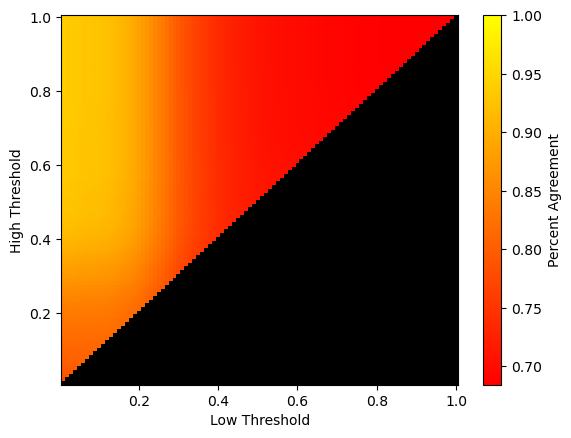

In [94]:
x = arr
y = arr
X,Y = np.meshgrid(x,y)
tmp = Z[~np.isnan(Z)]

cmap1 = plt.cm.get_cmap('autumn').copy()
cmap1.set_bad(color='black')
plt.pcolormesh(X,Y,Z, cmap = cmap1, vmin = np.min(np.min(tmp)), vmax = 1)
cbar = plt.colorbar(cmap='blues')
cbar.set_label('Percent Agreement')
plt.xlabel('Low Threshold')
plt.ylabel('High Threshold')

plt.show()

0.4199438202247191


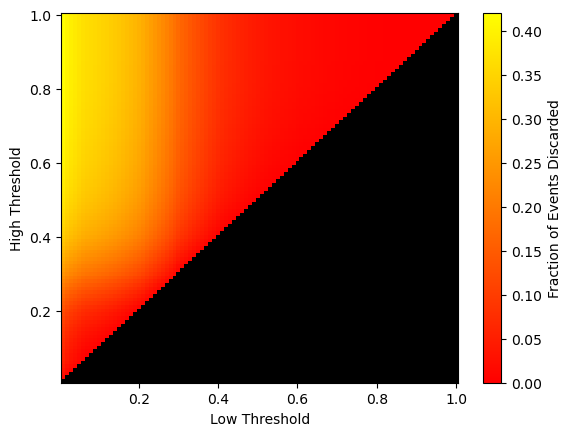

In [95]:

cmap1 = plt.cm.get_cmap('autumn').copy()
cmap1.set_bad(color='black')
tmp = Q[~np.isnan(Q)]
print(tmp.max())
plt.pcolormesh(X,Y,Q, cmap = cmap1, vmin = 0, vmax = tmp.max())
cbar = plt.colorbar()

cbar.set_label('Fraction of Events Discarded')
plt.xlabel('Low Threshold')
plt.ylabel('High Threshold')

plt.show()



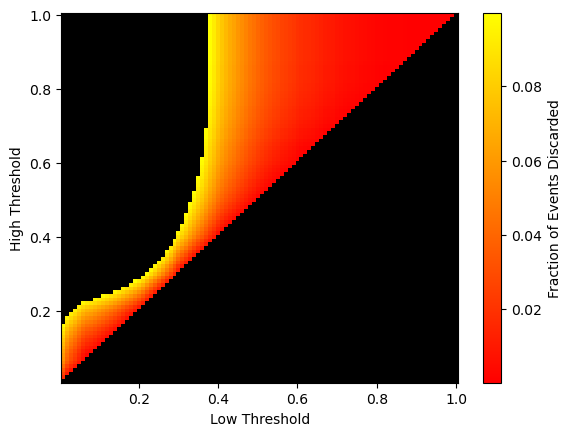

In [96]:
ind = np.where(Q > 0.1)
Q[ind[0], ind[1]] = np.nan
cmap1 = plt.cm.get_cmap('autumn').copy()
cmap1.set_bad(color='black')
tmp = Q[~np.isnan(Q)]
plt.pcolormesh(X,Y,Q, cmap = cmap1, vmin = tmp.min(), vmax = tmp.max())
cbar = plt.colorbar()

cbar.set_label('Fraction of Events Discarded')
plt.xlabel('Low Threshold')
plt.ylabel('High Threshold')

plt.show()

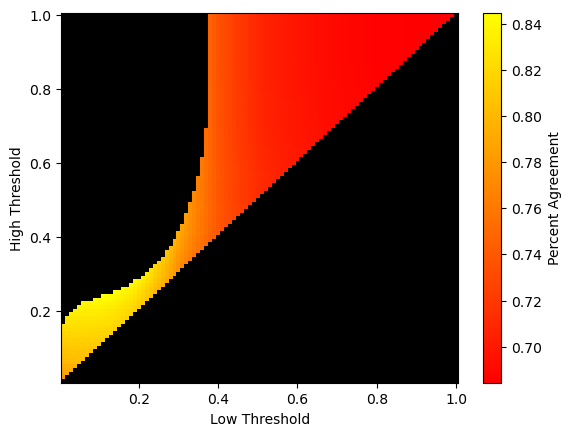

In [97]:
Z[ind[0], ind[1]] = np.nan
tmp = Z[~np.isnan(Z)]

cmap1 = plt.cm.get_cmap('autumn').copy()
cmap1.set_bad(color='black')
plt.pcolormesh(X,Y,Z, cmap = cmap1, vmin = np.min(np.min(tmp)), vmax = np.max(tmp))
cbar = plt.colorbar(cmap='blues')
cbar.set_label('Percent Agreement')
plt.xlabel('Low Threshold')
plt.ylabel('High Threshold')

plt.show()

In [98]:


ind = np.where(Q < 0.1)
print(ind)
print(Z)
Z_p = Z[ind[0], ind[1]]
print(max(Z_p))
ind2 = np.where(Z == max(Z[ind]))
print('Lower: {}\nHigher: {}'.format(x[ind2[1]], y[ind2[0]]))

(array([ 1,  2,  2, ..., 99, 99, 99], dtype=int64), array([ 0,  0,  1, ..., 96, 97, 98], dtype=int64))
[[       nan        nan        nan ...        nan        nan        nan]
 [0.78031928        nan        nan ...        nan        nan        nan]
 [0.78633301 0.78747045        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.68438305        nan        nan]
 [       nan        nan        nan ... 0.68430913 0.68430913        nan]]
0.8447559709241952
Lower: [0.11]
Higher: [0.24]
